<img src="https://i.ibb.co/1YbXrCsJ/logo-cpf-sesc.png" width="200">


## **Introdução à Visualização de Dados com Python**

Bem-vindo a este treinamento prático onde vamos nos aprofundar na visualização de dados com Python. Usando as bibliotecas `matplotlib` e `seaborn`, aprenderemos a criar visualizações prontas para apresentação.

Nesta sessão, vamos aprender a:

* Criar diversos tipos de gráficos, incluindo gráficos de barras, distribuições, boxplots e outros usando `seaborn` e `matplotlib`.
* Formatar e estilizar suas visualizações para deixá-las prontas para relatórios.
* Criar subplots para visualizações mais claras e melhorar seu fluxo de trabalho.


# O Conjunto de Dados

O conjunto de dados utilizado neste webinar é um arquivo CSV chamado `employee_churn_trimmed.csv`, que contém informações sobre funcionários que saíram ou permaneceram em seus empregos. O objetivo da sessão de hoje é investigar o que pode estar impulsionando a rotatividade (*churn*) e apresentar os achados em *plots* esteticamente bem elaborados.

**Dados dos funcionários:**

- **Age**: Idade do funcionário.  
- **Attrition**: O funcionário saiu da empresa ou não? (Churned, Stayed).  
- **DistanceFromHome**: Distância entre a casa do funcionário e o escritório, em km.  
- **Education**: Nível de escolaridade ('Bellow College', 'College', 'Bachelor's degree', 'Master's degree', 'PhD').  
- **EducationField**: Área de estudo.  
- **Gender**: Gênero do funcionário ('Male', 'Female').  
- **MonthlyIncome**: Renda mensal em dólares (USD $).  
- **PercentSalaryHike**: Percentual de aumento salarial no último ano.  
- **PerformanceRating**: Avaliação de desempenho do funcionário (Low, Good, Great, Excellent).  
- **YearsAtCompany**: Número de anos na empresa.

**Respostas da pesquisa:**

- **EnvironmentSatisfaction**: Avaliação da satisfação com o ambiente de trabalho (Low, Good, Great, Excellent).  
- **JobInvolvement**: Avaliação do envolvimento com o trabalho (Low, Good, Great, Excellent).  
- **JobSatisfaction**: Avaliação da satisfação com o trabalho (Low, Good, Great, Excellent).  
- **RelationshipSatisfaction**: Avaliação da satisfação nos relacionamentos no ambiente de trabalho (Low, Good, Great, Excellent).  
- **WorklifeBalance**: Avaliação do equilíbrio entre vida pessoal e trabalho (Low, Good, Great, Excellent).


In [2]:
# Importando os pacotes relevantes com seus respectivos aliases
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [3]:
# Leitura dos dados
rotatividade_funcionarios = pd.read_csv(
    'https://github.com/adelnehme/intro-to-data-visualization-Python-live-training/blob/master/employee_churned_trimmed.csv?raw=true',
    index_col="Unnamed: 0"
)

In [4]:
# Exibir as primeiras linhas do DataFrame
rotatividade_funcionarios.head()

,Age,Attrition,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,WorkLifeBalance,YearsAtCompany
0,41,Churned,1,College,Life Sciences,Good,Female,Great,Excellent,5993,11,Great,Low,80,Low,6
1,49,Stayed,8,Below College,Life Sciences,Great,Male,Good,Good,5130,23,Excellent,Excellent,80,Great,10
2,37,Churned,2,College,Other,Excellent,Male,Good,Great,2090,15,Great,Good,80,Great,0
3,33,Stayed,3,Master's degree,Life Sciences,Excellent,Female,Great,Great,2909,11,Great,Great,80,Great,8
4,27,Stayed,2,Below College,Medical,Low,Male,Great,Good,3468,12,Great,Excellent,80,Great,2


# Fundamentos da Visualização de Dados I: A anatomia de uma *figure* do matplotlib

Ao utilizar uma função simples do matplotlib ou seaborn, como `plt.plot(meus_dados)`, o que o matplotlib faz nos bastidores é criar três objetos aninhados.

- O objeto **figure**, que pode ser considerado como o suporte da tela, ou um objeto que contém todos os possíveis eixos (*axes*).  
- O(s) objeto(s) **axes**, que podem ser considerados como as telas propriamente ditas, ou o *plot* onde adicionaremos nossas visualizações.  
- Tudo o que compõe o *plot*.


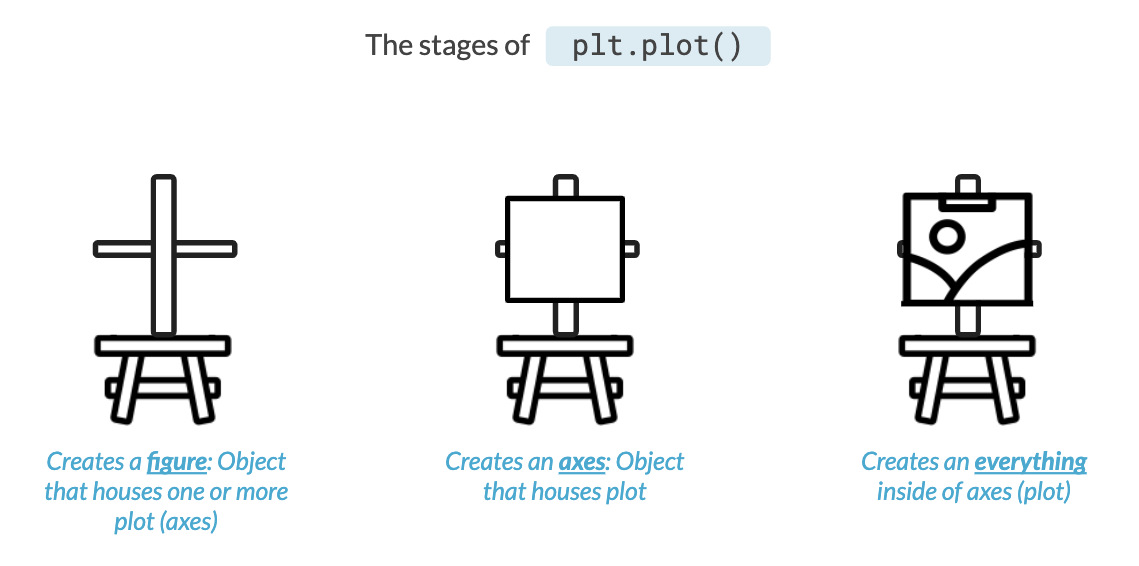

- A **figure** abriga os **axes** (neste caso, apenas 1, já que é um único *plot*).  
- Os **axes** (o *plot* vazio).  
- Tudo o que compõe o *plot* (a linha azul).

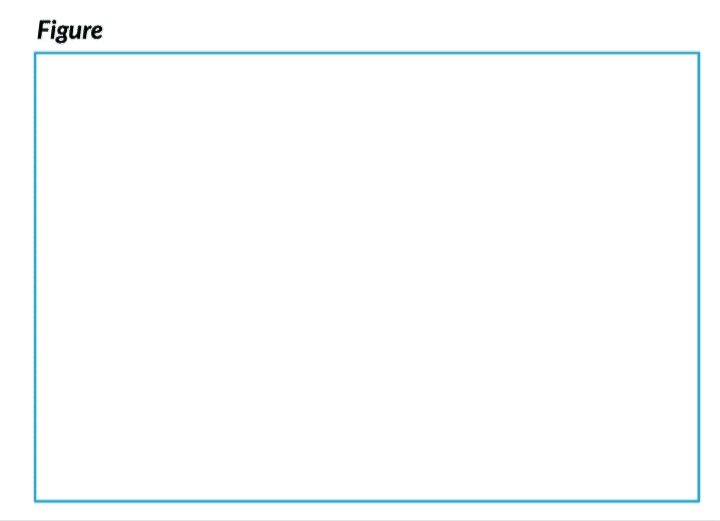

# Compreendendo nossa base de funcionários

## Qual é a faixa etária dos nossos funcionários?

Uma ótima visualização para entender a distribuição de uma variável numérica é o *distribution plot* (ou *kernel density estimate*). Diferentemente de um histograma, ele não é limitado pela quantidade de intervalos (*bins*) e representa melhor a distribuição da variável.

```python
sns.kdeplot(data=..., color="", fill=True, linewidth=1.5)
```

### Parâmetros principais:

- `data`: a série de dados numéricos que será utilizada para construir a curva de densidade.  
- `color`: define a cor da curva KDE.  
- `fill`: se `True`, preenche a área sob a curva — útil para facilitar a visualização.  
- `linewidth`: define a espessura da linha da curva.  
- `kde_kws` *(opcional)*: dicionário com parâmetros adicionais para customizar o estilo da curva (ex: `linestyle`, `bw_adjust`, etc).



**Algumas funções auxiliares utilizadas:**

- `plt.axvline(x, ymin=0, ymax=1, linestyle)` permite adicionar uma linha vertical ao seu *plot*.  
  - `x`, `ymin` e `ymax` determinam a posição da linha.  
  - `linestyle` permite formatar o estilo da linha.

- `plt.text(x, y, s, fontsize, style)` permite adicionar texto ao *plot*.  
  - `x`, `y` definem a posição do texto.  
  - `s` é o texto a ser exibido.

- `plt.xlabel(..., fontsize= , fontweight= )` adiciona o rótulo ao eixo x.  
- `plt.ylabel(..., fontsize= , fontweight= )` adiciona o rótulo ao eixo y.  
- `plt.title(..., fontsize= , fontweight= )` adiciona o título do gráfico.  
- `plt.yticks(...)` permite especificar o que é exibido no eixo y.


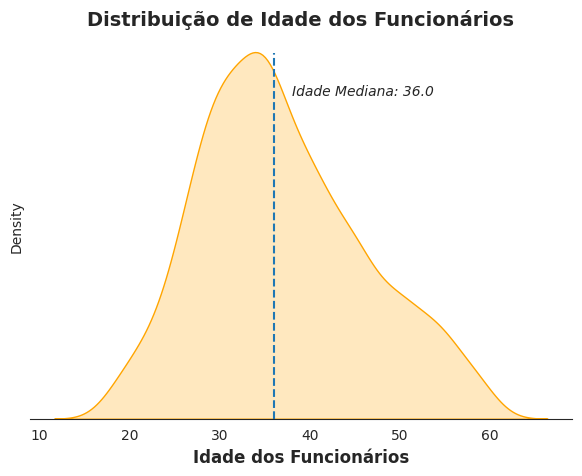

In [5]:
# Definir opções iniciais do plot
sns.set_style('white')
plt.figure(figsize=(7, 5))

# Criar a curva de densidade
sns.kdeplot(data=rotatividade_funcionarios['Age'],
            color="orange",
            fill=True)  # Substitui o antigo shade=True

# Adicionar linha vertical na mediana
plt.axvline(rotatividade_funcionarios['Age'].median(),
            ymax=0.95,
            linestyle="--")

# Adicionar texto com a idade mediana
plt.text(rotatividade_funcionarios['Age'].median() + 2, 0.04,
         'Idade Mediana: ' + str(rotatividade_funcionarios['Age'].median()),
         fontsize=10, style="italic")

# Remover borda esquerda do gráfico
sns.despine(left=True)

# Toques finais
plt.yticks([])
plt.xlabel('Idade dos Funcionários', fontsize=12, fontweight="semibold")
plt.title('Distribuição de Idade dos Funcionários', fontsize=14, fontweight="semibold")
plt.show()


# Fundamentos da Visualização de Dados II: *Subplots* e múltiplos eixos

Uma das características marcantes da criação de visualizações com matplotlib é o alto nível de controle oferecido para criar múltiplos *plots* de uma só vez. Como discutido anteriormente, a geração de um *plot* exige a criação de três objetos hierárquicos:

- O objeto **figure**, que pode ser considerado como o suporte da tela, ou um objeto que contém todos os possíveis *axes* (gráficos).
- O(s) objeto(s) **axes**, que podem ser considerados como as telas propriamente ditas, ou os *plots* onde adicionaremos nossas visualizações.
- Tudo o que compõe o *plot*.

Criar uma *figure* com múltiplos *subplots* (eixos) é fácil, e pode ser feito da seguinte forma:

```python
figure, axes = plt.subplots(nrows= , ncols= , figsize=...)
```

Aqui, geramos um objeto figure e seus axes. Uma figure pode ser dividida em uma grade de linhas e colunas, onde cada “célula” nessa grade é um axes, e podemos desenhar algo dentro dela.


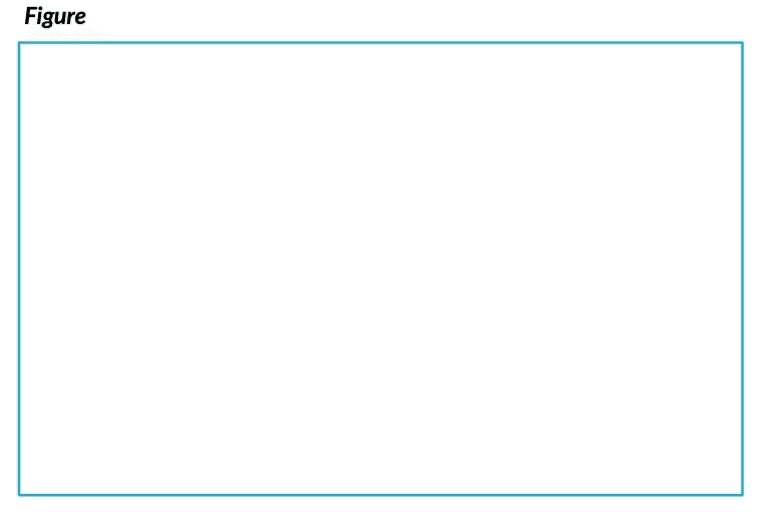

Por exemplo, `figure, axes = plt.subplots(1, 2)` cria uma *figure* com 2 *axes* dispostos horizontalmente (lado a lado). O objeto `axes` é um array do NumPy, onde cada elemento é uma referência a um *axes*.

Para criar visualizações dentro de um *axes*, a maioria das funções de visualização possui um argumento `ax` que permite definir em qual *axes* a visualização será desenhada.

Podemos personalizar o conteúdo de cada *plot* dentro de um *axes* usando métodos do próprio `axes`, que são muito semelhantes (ou idênticos) às funções auxiliares que usamos com `plt`. Para personalizar o primeiro *axes* no exemplo acima, usamos:

```python
plt.xlabel()  -->  axes[0].set_xlabel()
plt.text()    -->  axes[0].text()
```

Não é necessário memorizar a sintaxe ou as diferenças entre os métodos `plt` e os métodos de `axes` — apenas saiba que essa diferença existe.

---

## Qual é a distribuição da idade por gênero?



In [6]:
# Filtrar funcionários do gênero masculino e calcular a idade mediana
rotatividade_homens = rotatividade_funcionarios[rotatividade_funcionarios['Gender'] == "Male"]
idade_mediana_homens = rotatividade_homens['Age'].median()

# Filtrar funcionários do gênero feminino e calcular a idade mediana
rotatividade_mulheres = rotatividade_funcionarios[rotatividade_funcionarios['Gender'] == "Female"]
idade_mediana_mulheres = rotatividade_mulheres['Age'].median()


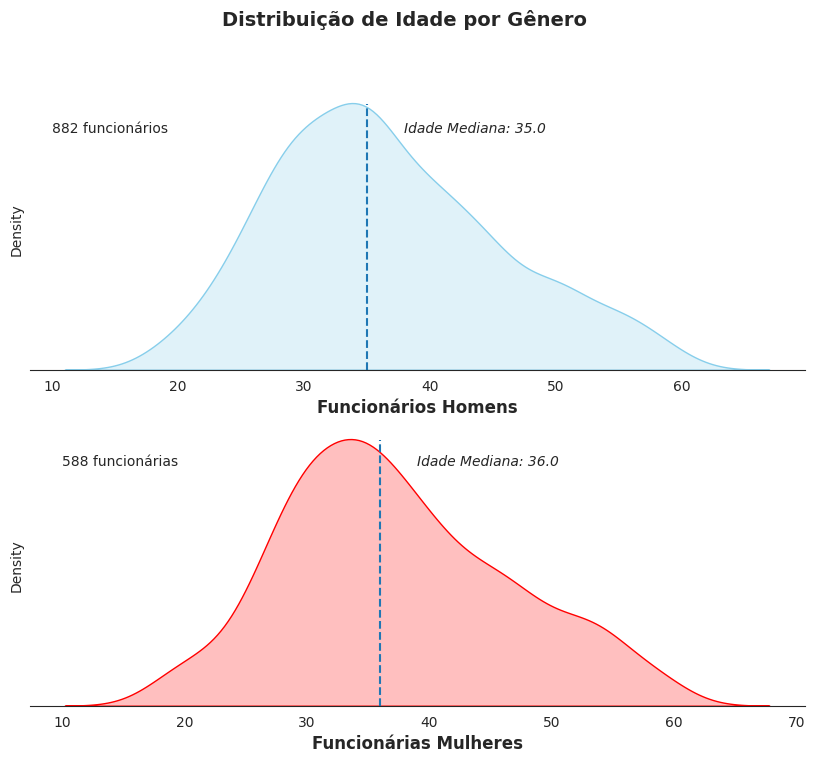

In [7]:
# Definir opções iniciais do plot
sns.set_style('white')

# Criar a figura e os eixos
figura, eixos = plt.subplots(2, 1, figsize=(10, 8))

# Plotar a KDE da idade dos homens no primeiro eixo
sns.kdeplot(rotatividade_homens['Age'],
            color="skyblue",
            fill=True,
            ax=eixos[0])

# Adicionar linha vertical e anotação da idade mediana dos homens
eixos[0].axvline(idade_mediana_homens, ymax=0.95, linestyle="--")
eixos[0].text(idade_mediana_homens + 3, 0.04, 'Idade Mediana: ' + str(idade_mediana_homens), fontsize=10, style="italic")
eixos[0].text(10, 0.04, str(rotatividade_homens.shape[0]) + " funcionários", fontsize=10)
eixos[0].set_yticks([])
eixos[0].set_xlabel("Funcionários Homens", fontsize=12, fontweight="semibold")

# Plotar a KDE da idade das mulheres no segundo eixo
sns.kdeplot(rotatividade_mulheres['Age'],
            color="r",
            fill=True,
            ax=eixos[1])

# Adicionar linha vertical e anotação da idade mediana das mulheres
eixos[1].axvline(idade_mediana_mulheres, ymax=0.95, linestyle="--")
eixos[1].text(idade_mediana_mulheres + 3, 0.04, 'Idade Mediana: ' + str(idade_mediana_mulheres), fontsize=10, style="italic")
eixos[1].text(10, 0.04, str(rotatividade_mulheres.shape[0]) + " funcionárias", fontsize=10)
eixos[1].set_yticks([])
eixos[1].set_xlabel("Funcionárias Mulheres", fontsize=12, fontweight="semibold")

# Remover bordas à esquerda
sns.despine(left=True)

# Título geral
figura.suptitle('Distribuição de Idade por Gênero', fontsize=14, fontweight="semibold")
plt.show()


# Perguntas e Respostas

## Qual é o nível de escolaridade dos nossos funcionários por gênero?

Uma ótima forma de contar a distribuição de dados categóricos é utilizando um *countplot*, que pode ser feito da seguinte maneira:

```python
sns.countplot(x= , hue= , data= , order= , palette= , alpha= )
```

- `x` é a variável categórica que queremos contar, e `order` permite definir a ordem das categorias visualizadas.  
- `hue` é a coluna pela qual queremos agrupar e categorizar na visualização.  
- `data` é a nossa fonte de dados.  
- `order` define a ordem das categorias no eixo x.  
- `palette` e `alpha` permitem definir a cor com base no `hue` e ajustar sua transparência.



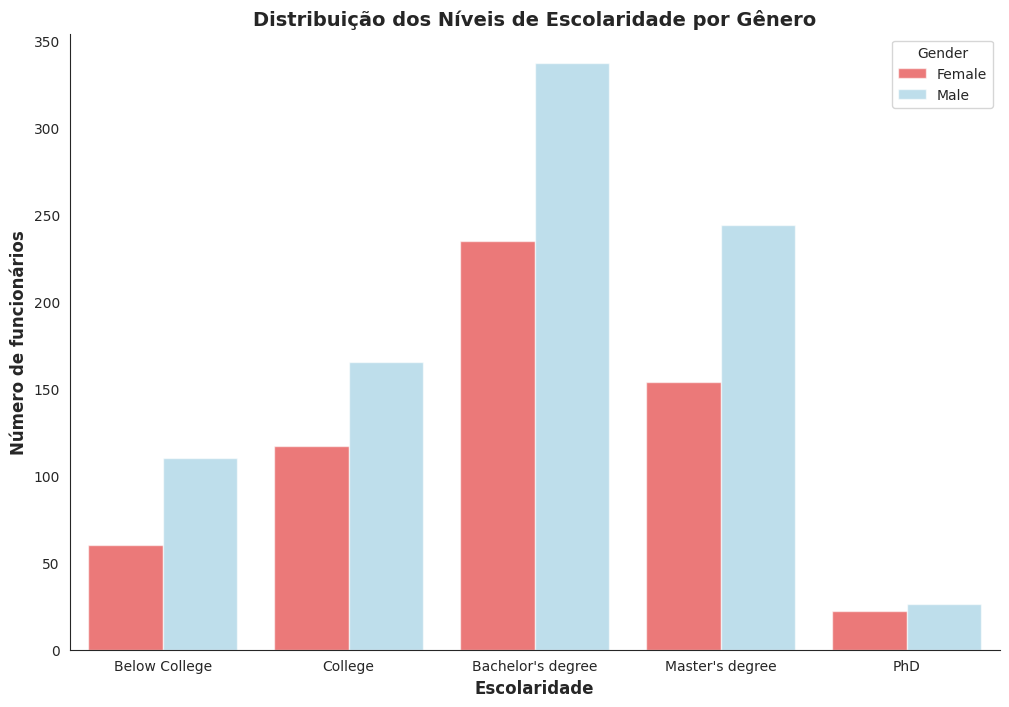

In [16]:
# Definir opções iniciais do plot
sns.set_style('white')
plt.figure(figsize=(12, 8))

# Criar um countplot
sns.countplot(x='Education',
              # Agrupar por Gênero
              hue='Gender',
              data=rotatividade_funcionarios,
              order=['Below College', 'College', "Bachelor's degree", "Master's degree", 'PhD'],
              # Definir cor do hue e transparência
              palette=["r", "skyblue"],
              alpha=0.6)

# Remover bordas
sns.despine()

# Estilização final
plt.ylabel("Número de funcionários", fontsize=12, fontweight="semibold")
plt.xlabel("Escolaridade", fontsize=12, fontweight="semibold")
plt.title("Distribuição dos Níveis de Escolaridade por Gênero", fontweight="semibold", fontsize=14)
plt.show()


# Compreendendo quem sai vs quem permanece na empresa

## Existe alguma relação entre idade ou distância de casa (em km) e a saída da empresa?

Uma ótima forma de observar as diferenças entre dois grupos (ou categorias) de dados com base em um valor numérico é o *boxplot*, que visualiza os seguintes elementos:


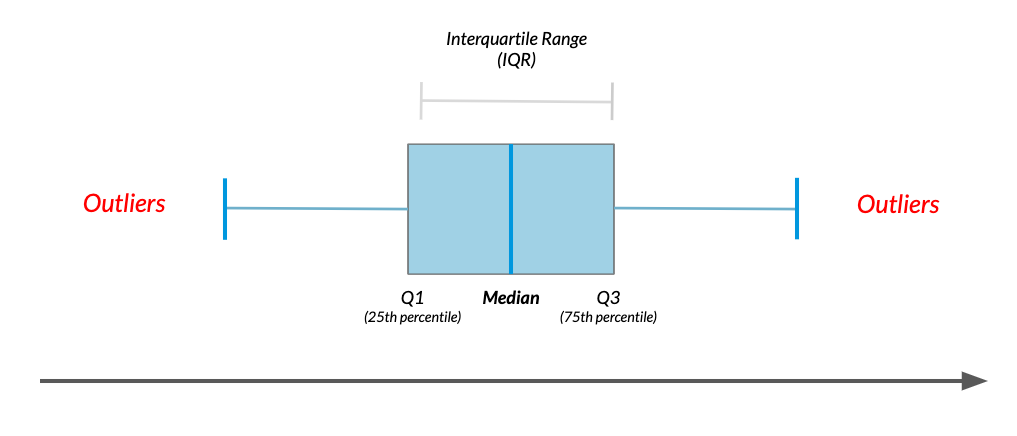

Ele pode ser criado da seguinte forma:

```python
sns.boxplot(x=, y=, data=, order=, width=, linewidth=, palette=)
```

- `x` é a variável categórica pela qual queremos agrupar os dados, e `order` permite definir a ordem das categorias visualizadas.  
- `y` são os dados que estamos observando dentro de cada grupo.  
- `width` e `linewidth` determinam, respectivamente, a largura da caixa e a espessura do contorno.  
- `palette` define a cor dos grupos.


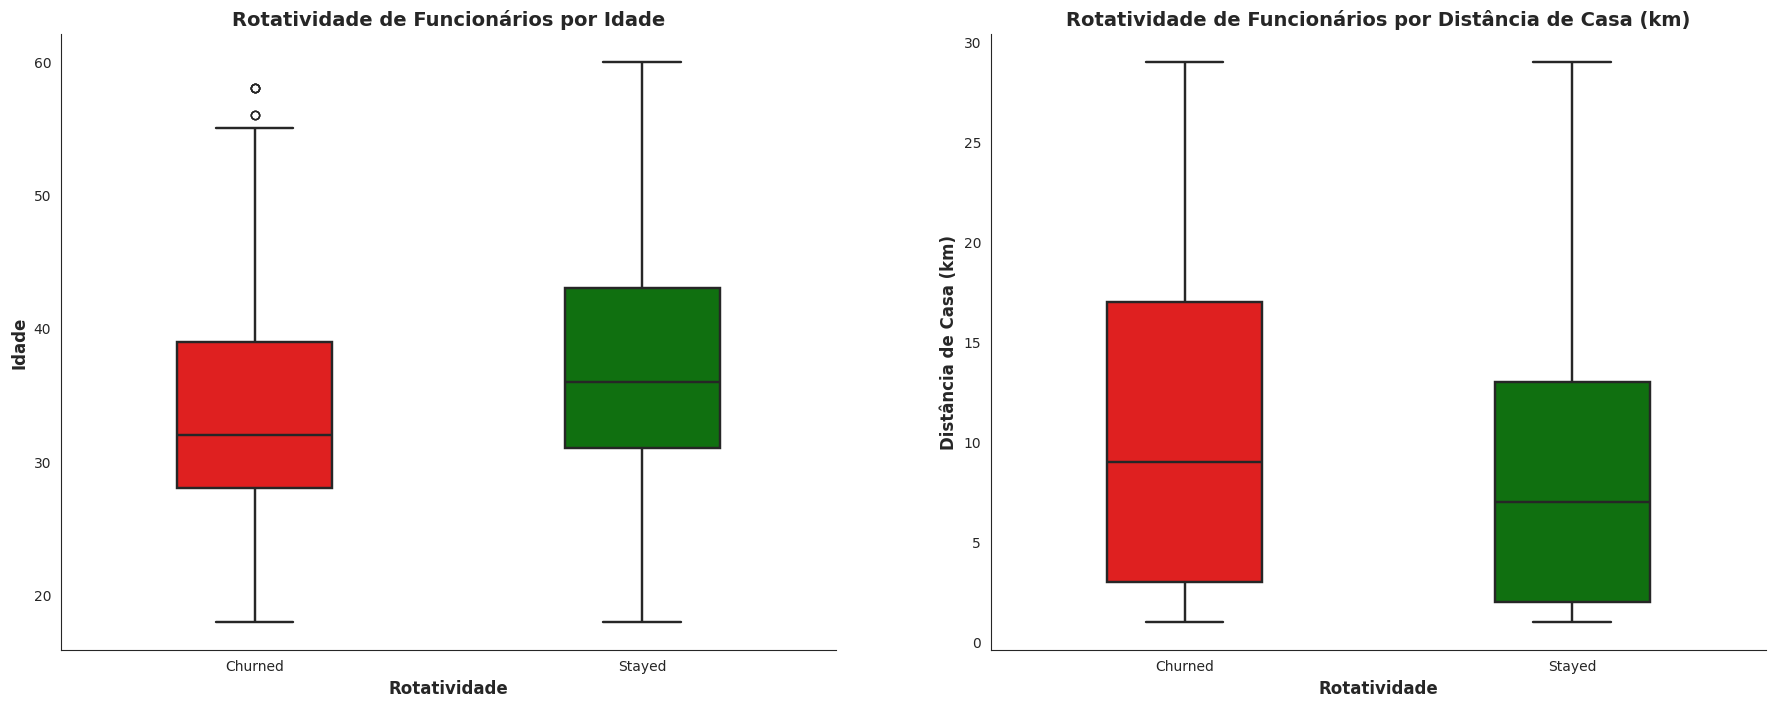

In [9]:
# Definir opções iniciais do plot
sns.set_style('white')

# Criar listas auxiliares
colunas_para_plotar = ['Age', 'DistanceFromHome']
titulos_para_plotar = ['Idade', 'Distância de Casa (km)']

# Criar os subplots
figura, eixos = plt.subplots(1, 2, figsize=(22, 8))

# Iterar sobre cada eixo e plotar o boxplot com as colunas e títulos correspondentes
for eixo, coluna, titulo in zip(eixos, colunas_para_plotar, titulos_para_plotar):

  # Criar o boxplot
  sns.boxplot(
      x="Attrition",
      y=coluna,
      data=rotatividade_funcionarios,
      order=["Churned", "Stayed"],
      width=0.4,
      linewidth=1.75,
      hue="Attrition",                  # Adicionado para compatibilidade
      palette=["r", "g"],
      legend=False,                     # Evita legenda duplicada
      ax=eixo
  )

  # Remover bordas
  sns.despine()
  # Estilização final de cada eixo
  eixo.set_xlabel("Rotatividade", fontsize=12, fontweight="semibold")
  eixo.set_ylabel(titulo, fontsize=12, fontweight="semibold")
  eixo.set_title("Rotatividade de Funcionários por " + titulo, fontweight="semibold", fontsize=14)

plt.show()


## O que os funcionários que saíram vs os que ficaram pensam sobre trabalhar conosco?


In [10]:
# Calcular a proporção de Satisfação nos Relacionamentos por categoria de Rotatividade
satisfacao_relacionamento_rotatividade = pd.crosstab(rotatividade_funcionarios['RelationshipSatisfaction'],
                                                     rotatividade_funcionarios['Attrition'],
                                                     # Calcular proporções por linha
                                                     normalize="index").reset_index()

# Unificar proporções em formato percentual
satisfacao_relacionamento_rotatividade[['Churned', 'Stayed']] = satisfacao_relacionamento_rotatividade[['Churned', 'Stayed']] * 100
satisfacao_relacionamento_rotatividade['Total'] = satisfacao_relacionamento_rotatividade['Churned'] + satisfacao_relacionamento_rotatividade['Stayed']

# Visualizar resultado
satisfacao_relacionamento_rotatividade


Attrition,RelationshipSatisfaction,Churned,Stayed,Total
0,Excellent,14.814815,85.185185,100.0
1,Good,14.851485,85.148515,100.0
2,Great,15.468410,84.531590,100.0
3,Low,20.652174,79.347826,100.0


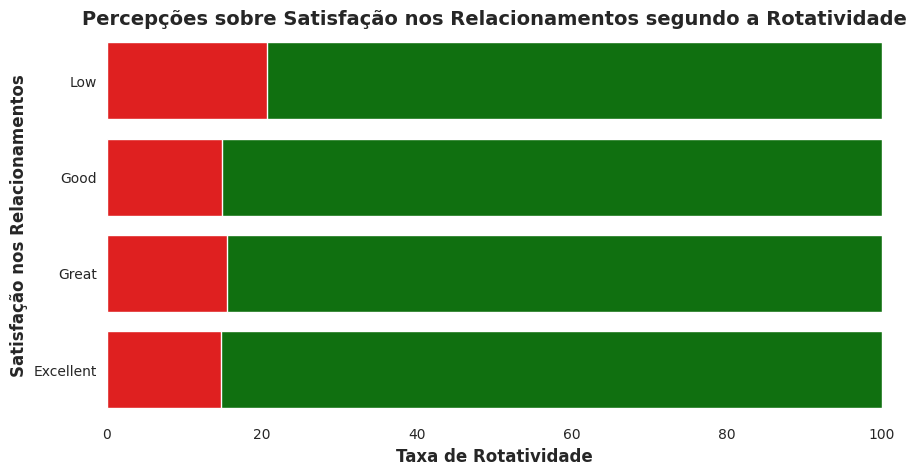

In [11]:
# Definir opções iniciais do plot
sns.set_style('white')
plt.figure(figsize=(10, 5))

# Plotar a porcentagem total de funcionários (ou seja, 100%)
sns.barplot(x="Total",
            y="RelationshipSatisfaction",
            data=satisfacao_relacionamento_rotatividade,
            order=['Low', 'Good', 'Great', 'Excellent'],
            color="g")

# Plotar a porcentagem de funcionários que saíram da empresa
sns.barplot(x="Churned",
            y="RelationshipSatisfaction",
            data=satisfacao_relacionamento_rotatividade,
            order=['Low', 'Good', 'Great', 'Excellent'],
            color="r")

# Remover bordas do gráfico
sns.despine(left=True, bottom=True)

# Estilização final
plt.xlim(0, 100)
plt.xlabel("Taxa de Rotatividade", fontweight="semibold", fontsize=12)
plt.ylabel("Satisfação nos Relacionamentos", fontweight="semibold", fontsize=12)
plt.title("Percepções sobre Satisfação nos Relacionamentos segundo a Rotatividade",
          fontweight="semibold", fontsize=14)

plt.show()


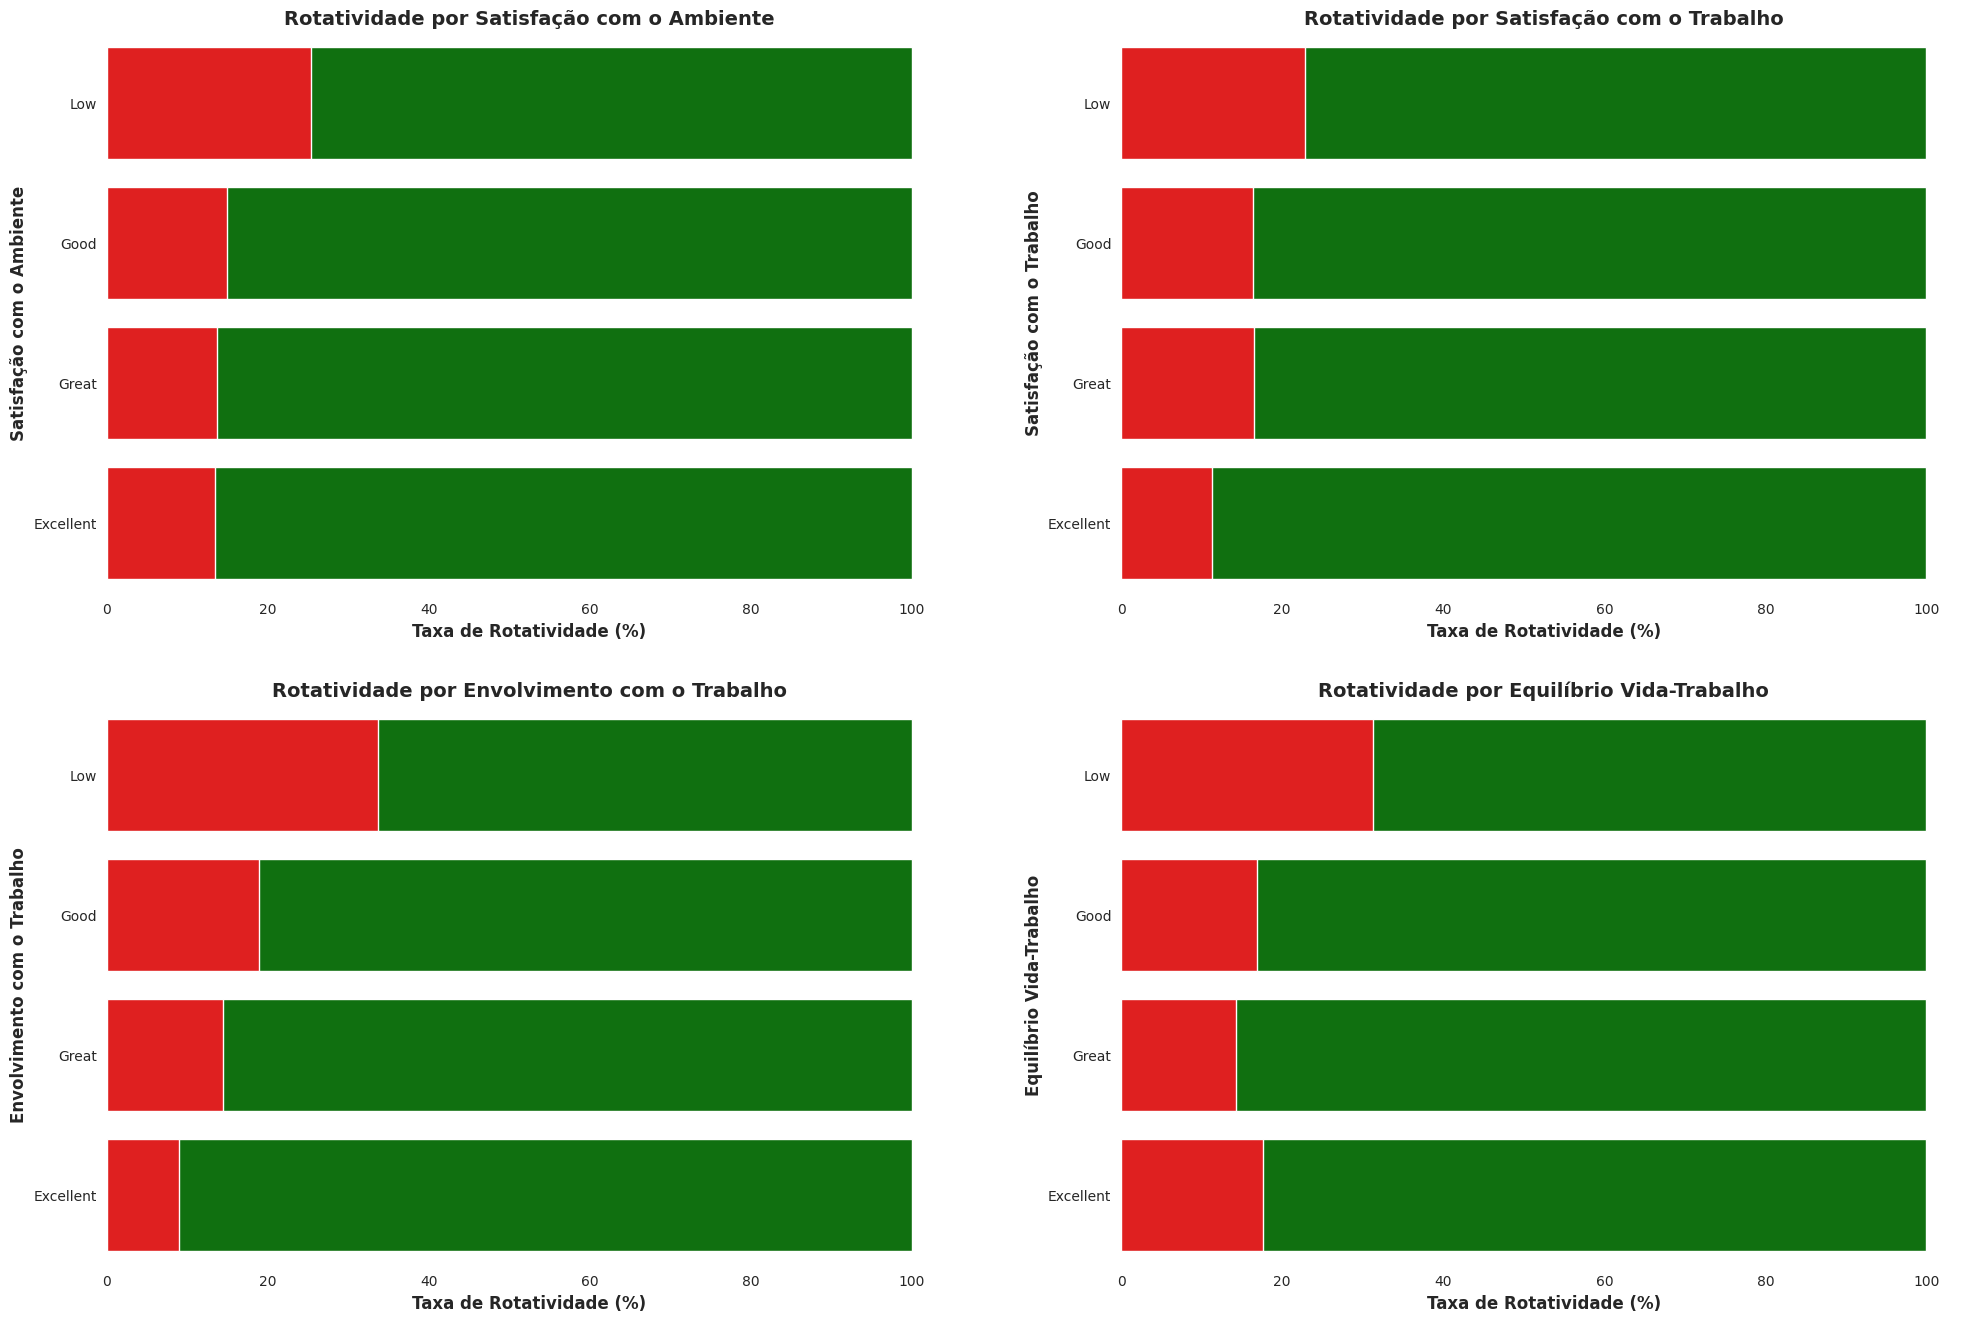

In [12]:
# Definir opções iniciais do plot
sns.set_style('white')

# Criar listas auxiliares
colunas_pesquisa = ["EnvironmentSatisfaction", "JobSatisfaction", "JobInvolvement", "WorkLifeBalance"]
titulos_pesquisa = ["Satisfação com o Ambiente", "Satisfação com o Trabalho", "Envolvimento com o Trabalho", "Equilíbrio Vida-Trabalho"]

# Criar subplots - 2 linhas, 2 colunas
figura, eixos = plt.subplots(2, 2, figsize=(24, 16))

# Para cada elemento
for eixo, pergunta_pesquisa, titulo_pesquisa in zip(eixos.flatten(), colunas_pesquisa, titulos_pesquisa):

  # Tabelar cruzadamente os dados e gerar proporções para cada pergunta
  proporcoes = pd.crosstab(rotatividade_funcionarios[pergunta_pesquisa],
                           rotatividade_funcionarios['Attrition'],
                           # Calcular proporções por linha
                           normalize="index").reset_index()

  # Converter proporções em percentuais
  proporcoes[['Churned', 'Stayed']] = proporcoes[['Churned', 'Stayed']] * 100

  # Criar coluna de total para cada pergunta
  proporcoes['Total'] = proporcoes['Churned'] + proporcoes['Stayed']

  # Plotar gráfico com o total (100%)
  sns.barplot(x="Total",
              y=pergunta_pesquisa,
              data=proporcoes,
              order=['Low', 'Good', 'Great', 'Excellent'],
              color="g",
              ax=eixo)

  # Plotar gráfico com os funcionários que saíram
  sns.barplot(x="Churned",
              y=pergunta_pesquisa,
              data=proporcoes,
              order=['Low', 'Good', 'Great', 'Excellent'],
              color="r",
              ax=eixo)

  # Remover bordas
  sns.despine(left=True, bottom=True)

  # Formatação final
  eixo.set_title("Rotatividade por " + titulo_pesquisa, fontweight="semibold", fontsize=14)
  eixo.set_ylabel(titulo_pesquisa, fontsize=12, fontweight="semibold")
  eixo.set_xlabel("Taxa de Rotatividade (%)", fontsize=12, fontweight="semibold")


# Quais iniciativas podem reduzir a rotatividade?

## Salários mais altos reduzem a rotatividade? Isso se aplica a todas as faixas etárias?

*Scatterplots* são uma ótima forma de visualizar a relação entre duas variáveis numéricas — e podem ser criados da seguinte maneira:

```python
sns.scatterplot(x=, y=, hue=, size=, style=, data=, palette=, alpha=)
```

Onde:  
- `x`, `y` são os nomes das colunas usadas nos eixos x e y, e `data` é a fonte de dados.  
- `hue` permite agrupar os pontos com base em outra coluna.  
- `size` e `style` permitem definir, respectivamente, o tamanho e o estilo dos marcadores com base em uma coluna.  
- `palette` e `alpha` controlam a cor e a transparência dos pontos.


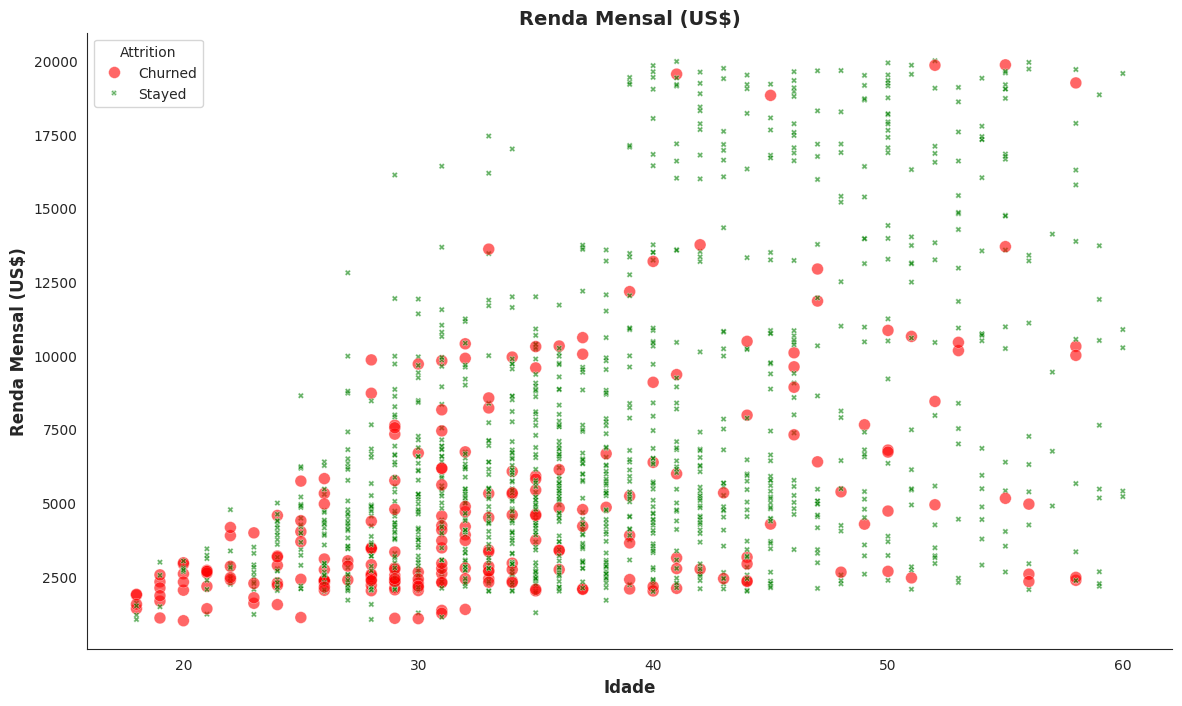

In [13]:
# Definir opções iniciais do plot
sns.set_style('white')
plt.figure(figsize=(14, 8))

# Criar o scatterplot
sns.scatterplot(x="Age",
                y="MonthlyIncome",
                # Agrupar e alterar estilo/tamanho dos pontos por Rotatividade
                hue="Attrition",
                size="Attrition",
                style="Attrition",
                data=rotatividade_funcionarios,
                # Definir cores para as categorias de rotatividade
                palette=["r", "g"],
                alpha=0.6)

# Remover bordas
sns.despine()

# Estilização final
plt.xlabel("Idade", fontsize=12, fontweight="semibold")
plt.ylabel("Renda Mensal (US$)", fontsize=12, fontweight="semibold")
plt.title("Renda Mensal (US$)", fontsize=14, fontweight="semibold")
plt.show()


## Os aumentos salariais do último ano impactaram a rotatividade?

Semelhantes aos *scatterplots*, os *swarmplots* são projetados para mostrar a relação e a distribuição de valores entre uma variável categórica e uma variável numérica. Eles podem ser gerados da seguinte forma:

```python
sns.swarmplot(x= , y=, hue=, data=, order=, palette=, size=, alpha=)
```

- `x`, `y` são os nomes das colunas usadas nos eixos x e y, e `order` define a ordem das categorias sendo avaliadas.  
- `hue` permite agrupar os dados com base em outra coluna.  
- `palette`, `alpha` e `size` controlam, respectivamente, a cor, a transparência e o tamanho dos marcadores.



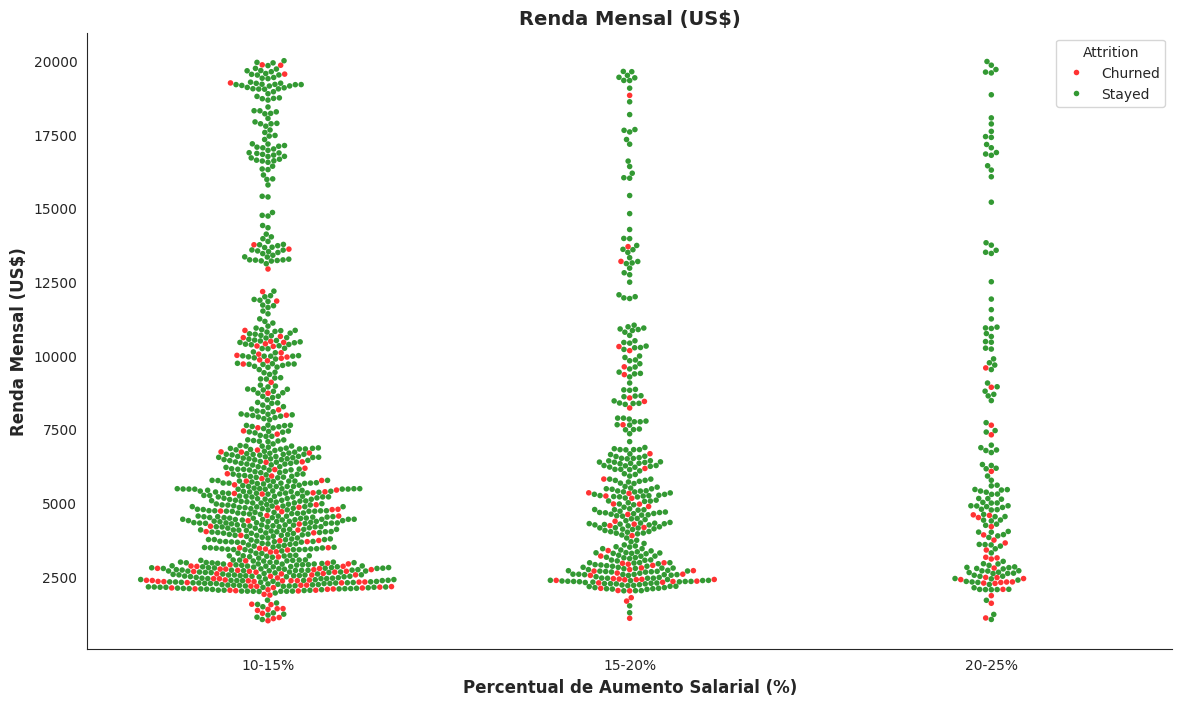

In [14]:
# Criar categorias para os aumentos salariais
rotatividade_funcionarios['categoria_aumento'] = pd.cut(rotatividade_funcionarios['PercentSalaryHike'],
                                                        # Definir faixas de corte: 10-15, 15-20, 20-25
                                                        [10, 15, 20, 25],
                                                        # Definir rótulos das categorias
                                                        labels=['10-15%', '15-20%', '20-25%'])

# Definir opções iniciais do plot
sns.set_style('white')
plt.figure(figsize=(14, 8))

# Criar o swarmplot
sns.swarmplot(x="categoria_aumento",
              y="MonthlyIncome",
              # Agrupar por Rotatividade
              hue="Attrition",
              data=rotatividade_funcionarios,
              # Ordenar categorias
              order=['10-15%', '15-20%', '20-25%'],
              # Definir cores das categorias de rotatividade
              palette=['r', 'g'],
              # Ajustar tamanho e transparência dos pontos
              size=4, alpha=0.8)

# Remover bordas
sns.despine()

# Estilização final
plt.xlabel("Percentual de Aumento Salarial (%)", fontsize=12, fontweight="semibold")
plt.ylabel("Renda Mensal (US$)", fontsize=12, fontweight="semibold")
plt.title("Renda Mensal (US$)", fontsize=14, fontweight="semibold")
plt.show()


## O número de anos na empresa afeta a rotatividade?

Uma das visualizações mais comuns é o *lineplot*, que representa a relação entre duas variáveis por meio de uma linha. Podemos criá-lo com:

```python
sns.lineplot(x= , y=, hue=, data=, style =, palette=, size=, markers=, ci =)
```

- `x`, `y` são os nomes das colunas usadas nos eixos x e y.  
- `hue` permite agrupar por uma coluna diferente, e `style` ajusta o estilo da linha com base nas categorias dessa coluna.  
- `palette`, `markers` e `ci` controlam, respectivamente, a cor, a adição de marcadores nos pontos da linha e a exibição do intervalo de confiança.


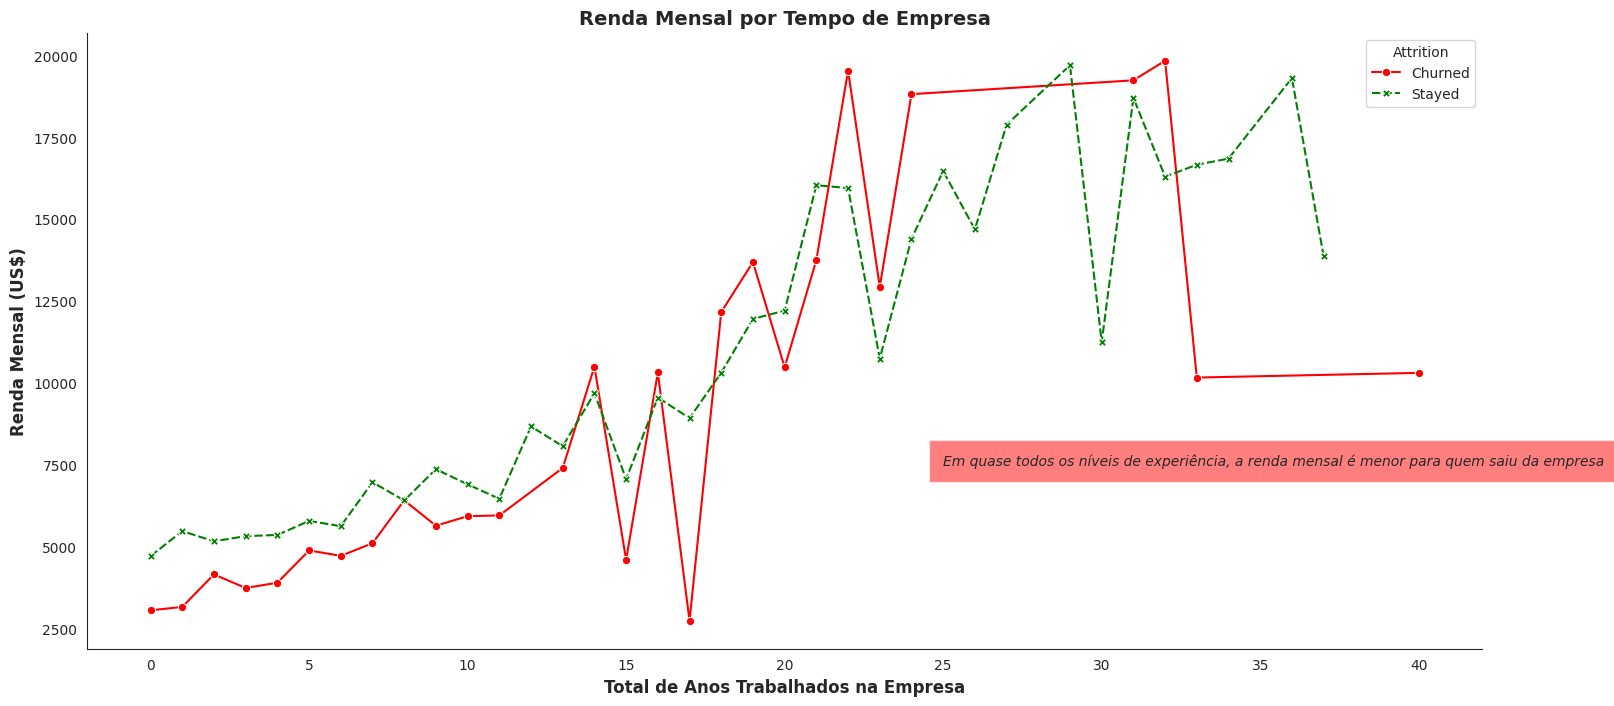

In [15]:
# Definir opções iniciais do plot
sns.set_style('white')
plt.figure(figsize=(18, 8))

# Criar um lineplot
sns.lineplot(x='YearsAtCompany',
             y='MonthlyIncome',
             # Definir cor e estilo da linha com base na Rotatividade
             hue="Attrition",
             style="Attrition",
             data=rotatividade_funcionarios,
             # Definir cores para cada categoria de rotatividade
             palette=["r", "g"],
             # Adicionar marcadores na linha e remover intervalo de confiança
             markers=True,
             errorbar=None)

# Adicionar texto com observações sobre o gráfico
plt.text(25, 7500,
         # Texto e estilo
         "Em quase todos os níveis de experiência, a renda mensal é menor para quem saiu da empresa",
         fontsize=10, style='italic',
         # Caixa de destaque em vermelho
         bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# Remover bordas do gráfico
sns.despine()

# Estilização final
plt.xlabel("Total de Anos Trabalhados na Empresa", fontsize=12, fontweight="semibold")
plt.ylabel("Renda Mensal (US$)", fontsize=12, fontweight="semibold")
plt.title("Renda Mensal por Tempo de Empresa", fontsize=14, fontweight="semibold")
plt.show()
